# Curated by Kashish Gupta (Masters in Quantitative Economics, UCLA)

##### Pairs trading is a market neutral trading strategy and it belongs to statistical arbitrage. The basic idea is to select two stocks which move similarly, sell high priced stock and buy low priced stock where there is a price divergence between the pairs.

In [ ]:
## lets take pepsi and coke 

In [ ]:
pip install yfinance 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf


In [ ]:
# Download historical data for Coca-Cola and PepsiCo

ko = yf.download("KO", start="2012-01-01", end="2022-12-31")
pep = yf.download("PEP", start="2012-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# calculate returns 

ko['returns'] = ko['Close'].pct_change()
pep['returns'] = pep['Close'].pct_change()

In [ ]:
# drop nans

ko = ko.dropna()
pep = pep.dropna()

<ipython-input-54-b0c4f15bd09b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pep['cum_returns'] = (1+pep['returns']).cumprod()-1


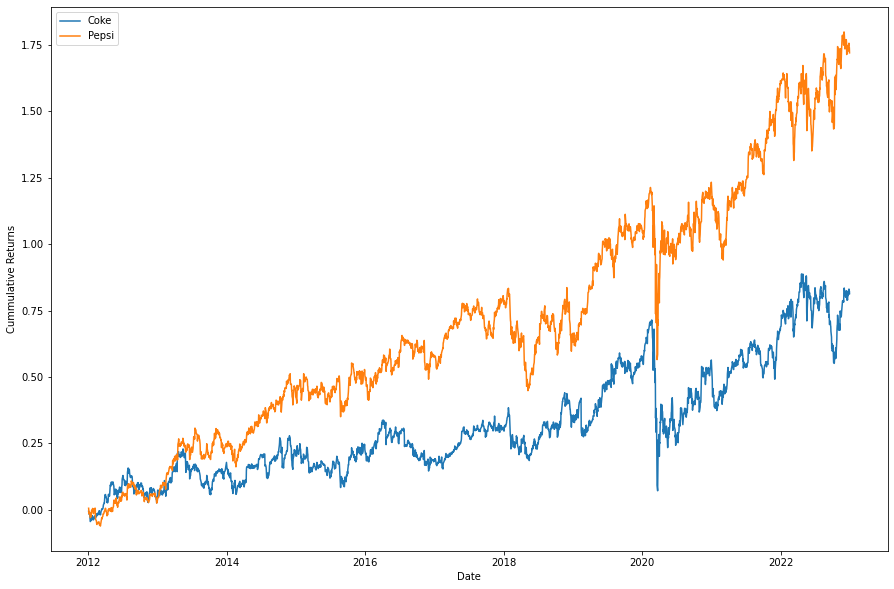

In [ ]:
# visualize cummulative returns 

ko['cum_returns'] = (1+ko['returns']).cumprod()-1
pep['cum_returns'] = (1+pep['returns']).cumprod()-1


import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt. plot(ko.index, ko['cum_returns'], label = 'Coke')
plt. plot(pep.index, pep['cum_returns'], label = 'Pepsi')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cummulative Returns')
plt.show()

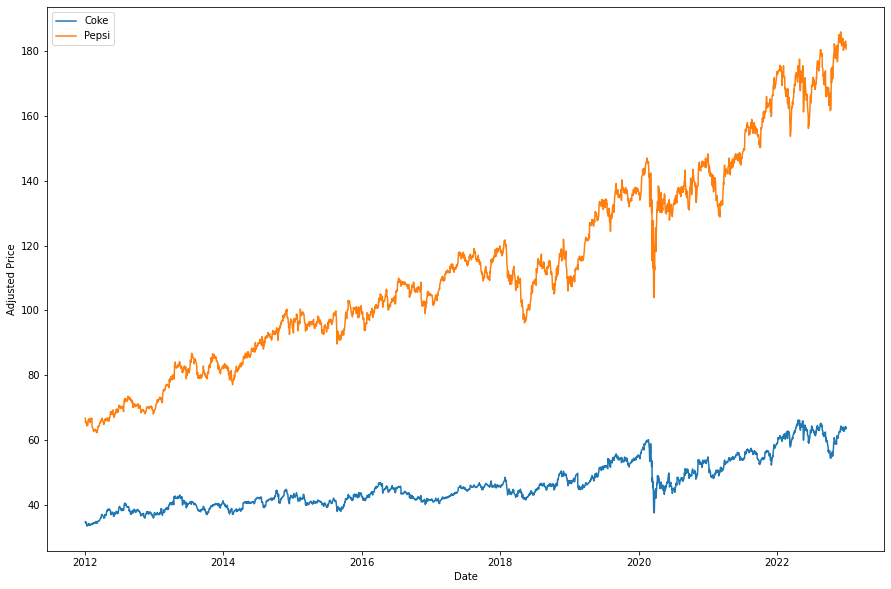

In [ ]:
# visualize adjusted price 

plt.figure(figsize=(15,10))
plt. plot(ko.index, ko['Close'], label = 'Coke')
plt. plot(pep.index, pep['Close'], label = 'Pepsi')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.show()

## CHECK COINTEGRATION

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import pandas as pd

In [ ]:
# check stationarity 
# using ADF TEST 

def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print(adf_output)

# CHECK STATIONARITY

In [ ]:
# Check Stationarity
result_A = adf_test(ko['returns'])
result_B = adf_test(pep['returns'])

### p-value is very small, we reject the null hypothesis and conclude that the time series is stationary

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.651243e+01
p-value                        2.099972e-29
#Lags Used                     1.200000e+01
Number of Observations Used    2.754000e+03
Critical Value (1%)           -3.432727e+00
Critical Value (5%)           -2.862590e+00
Critical Value (10%)          -2.567329e+00
dtype: float64
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.165270e+01
p-value                        2.019424e-21
#Lags Used                     2.600000e+01
Number of Observations Used    2.740000e+03
Critical Value (1%)           -3.432739e+00
Critical Value (5%)           -2.862595e+00
Critical Value (10%)          -2.567332e+00
dtype: float64


In [ ]:
# check cointegration 

# Engle-Granger test for Cointegration
def eg_test(x, y):
    print('Results of Engle-Granger Test:')
    eg_test = coint(x, y)
    eg_output = pd.Series(eg_test, index=['Test Statistic','p-value','Critical Value'])
    print(eg_output)

# Check Cointegration
eg_test(ko['returns'], pep['returns'])

## there is evidence of cointegration between the two stocks since p value is very small 

Results of Engle-Granger Test:
Test Statistic                                           -16.685113
p-value                                                         0.0
Critical Value    [-3.9004038543432835, -3.3383398939764906, -3....
dtype: object


In [ ]:
## A cointegration relationship indicates that the two assets have a long-run equilibrium relationship, but in the short run, they may diverge from this equilibrium. 

## The pairs trading strategy seeks to identify these divergences and trade accordingly, betting that the prices will revert to their equilibrium level.

# ESTIMATE SPREAD

In [ ]:
# estimate series spread
import numpy as np
import statsmodels.api as sm
x = list(np.log(ko['Close']))
x_const = sm.add_constant(x)
y = list(np.log(pep['Close']))
linear_reg = sm.OLS(y,x_const) # regressed pepsi on coke
results = linear_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 2.408e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        02:18:44   Log-Likelihood:                 2873.0
No. Observations:                2767   AIC:                            -5742.
Df Residuals:                    2765   BIC:                            -5730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6514      0.041    -40.342      0.000      -1.732      -1.571
x1             1.6608      0.011    155.189      0.000       1.640       1.682
==============================================================================
Omnibus:                       13.301   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.324
Skew:                           0.049   Prob(JB):                      0.00573
Kurtosis:                       2.717   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
beta = results.params[1]
alpha = results.params[0]
print(beta)
print(alpha)

1.6608146199188145
-1.651440989129696


In [ ]:
# then according the coke's price, whats pepsi's price 

y_pred = np.log(ko['Close'])*beta + alpha


Text(0, 0.5, 'spread')

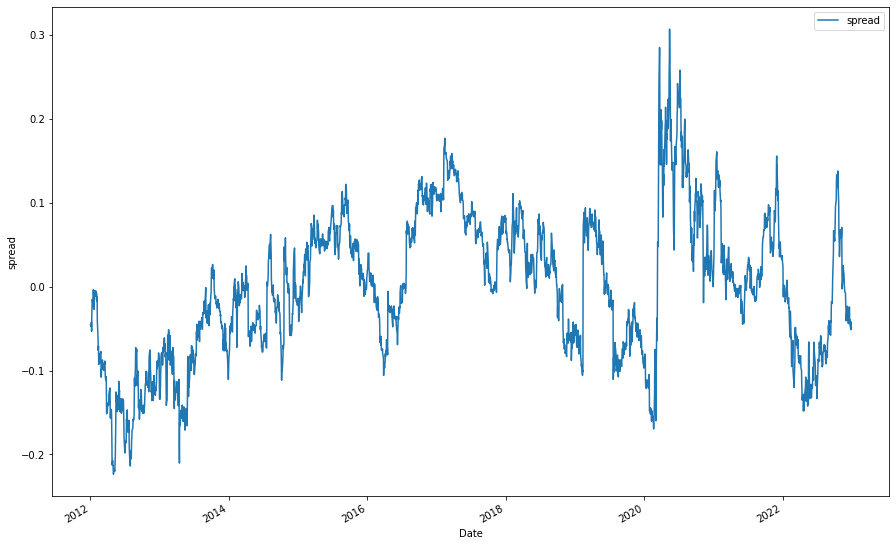

In [ ]:
# construct the spread series according to OLS result

df = pd.DataFrame(np.log(pep['Close']) - y_pred,index=ko['Close'].index)  # residuals (actual - predicted)
df.columns = ['spread']
df.plot(figsize =(15,10))
plt.ylabel('spread')

In [ ]:
kf_df = pd.DataFrame(df['spread'].copy())

In [ ]:
kf_df

,spread
Date,
2012-01-04,-0.045395
2012-01-05,-0.045336
2012-01-06,-0.047381
2012-01-09,-0.042195
2012-01-10,-0.053110
...,...
2022-12-23,-0.045581
2022-12-27,-0.051265
2022-12-28,-0.041864


# KALMAN FILTER

In [ ]:
# calculate filter value as S_hat = (1-k)St-1 + kSt
# S is spread 
# 1 = long position in coke and short position in pepsi
# -1 = short position in coke and long position in coke 

In [ ]:
import itertools

# define the range of values to search for each hyperparameter
k_range = [0.01, 0.05, 0.1, 0.5]
w_range = [10, 20, 30, 40]
z_range = [1.0, 1.5, 2.0, 2.5]

# create a list of all possible combinations of hyperparameters
param_grid = list(itertools.product(k_range, w_range, z_range))

# define the function to compute the mean squared error for a given set of hyperparameters
def compute_mse(params):
    k, w, z = params
    kf_df["Filter"] = kf_df.spread.ewm(alpha=k, adjust=False).mean()
    kf_df["Filter Error"] = kf_df.spread - kf_df["Filter"]
    kf_df["std"] = kf_df["Filter Error"].rolling(w).std()
    kf_df["Upper"] = kf_df["Filter"] + z * kf_df["std"]
    kf_df["Lower"] = kf_df["Filter"] - z * kf_df["std"]
    return np.mean((kf_df.spread - kf_df["Filter"]) ** 2)

# perform grid search and find the optimal set of hyperparameters
best_mse = float("inf")
best_params = None
for params in param_grid:
    mse = compute_mse(params)
    if mse < best_mse:
        best_mse = mse
        best_params = params

print("Best MSE:", best_mse)
print("Best params:", best_params)

Best MSE: 5.864201142443336e-05
Best params: (0.5, 10, 1.0)


In [ ]:
# use the best hyperparameters to compute the filter and filter error
k, w, z = best_params
kf_df["Filter"] = kf_df.spread.ewm(alpha=k, adjust=False).mean()
kf_df["Filter Error"] = kf_df.spread - kf_df["Filter"]
kf_df["std"] = kf_df["Filter Error"].rolling(w).std()
kf_df["Upper"] = kf_df["Filter"] + z * kf_df["std"]
kf_df["Lower"] = kf_df["Filter"] - z * kf_df["std"]

In [ ]:
kf_df.columns

Index(['spread', 'Filter', 'Filter Error', 'std', 'Upper', 'Lower'], dtype='object')

In [ ]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Define the grid of holding periods to test
holding_periods = [10, 20, 40, 60, 100]

# Define the number of splits for time series cross validation
n_splits = 5

# Define the time series cross validation split generator
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define the function to calculate the mean squared error for a given holding period
def calculate_mse(holding_period):
    # Create entry and exit signals based on holding period
    entry_signal = np.where(kf_df["Filter Error"].abs() > z * kf_df["std"], 1, 0)
    exit_signal = np.roll(entry_signal, -holding_period)
    exit_signal[-holding_period:] = 0

    # Calculate the test signal
    test_signal = np.where(entry_signal == 1, np.sign(kf_df["Filter Error"]), 0)
    test_signal = np.where(exit_signal == 1, 0, test_signal)

    # Calculate the returns and the squared returns
    returns = np.cumsum(test_signal * kf_df["spread"])
    squared_returns = np.square(returns)

    # Calculate the mean squared error
    mse = mean_squared_error(squared_returns, np.zeros_like(squared_returns))

    return mse

# Perform the grid search to find the optimal holding period
best_mse = np.inf
best_holding_period = None
for holding_period in holding_periods:
    mse_list = []
    for train_index, test_index in tscv.split(kf_df):
        train_df = kf_df.iloc[train_index]
        z = 2  # Set the z-score threshold
        mse = calculate_mse(holding_period)
        mse_list.append(mse)
    mean_mse = np.mean(mse_list)
    print(f"Holding period: {holding_period}, Mean squared error: {mean_mse}")
    if mean_mse < best_mse:
        best_mse = mean_mse
        best_holding_period = holding_period

print(f"Best holding period: {best_holding_period}, Best mean squared error: {best_mse}")


Holding period: 10, Mean squared error: 93.37426985135625
Holding period: 20, Mean squared error: 29.7606972079759
Holding period: 40, Mean squared error: 47.65243192657142
Holding period: 60, Mean squared error: 66.80118846004558
Holding period: 100, Mean squared error: 79.59984807957088
Best holding period: 20, Best mean squared error: 29.7606972079759


In [ ]:
# Define the holding period based on the grid search results
holding_period = 20

# Create entry and exit signals based on holding period
entry_signal = np.where(kf_df["Filter Error"].abs() > z * kf_df["std"], 1, 0)
exit_signal = np.roll(entry_signal, -holding_period)
exit_signal[-holding_period:] = 0

# Calculate the test signal
test_signal = np.where(entry_signal == 1, np.sign(kf_df["Filter Error"]), 0)
test_signal = np.where(exit_signal == 1, 0, test_signal)

# Add the test signal to the dataframe
kf_df["test"] = test_signal

In [ ]:
kf_df.test.value_counts()

# -1 is short coke and long pepsi 
# 1 is short pepsi and long coke 

 0.0    2564
-1.0     113
 1.0      90
Name: test, dtype: int64

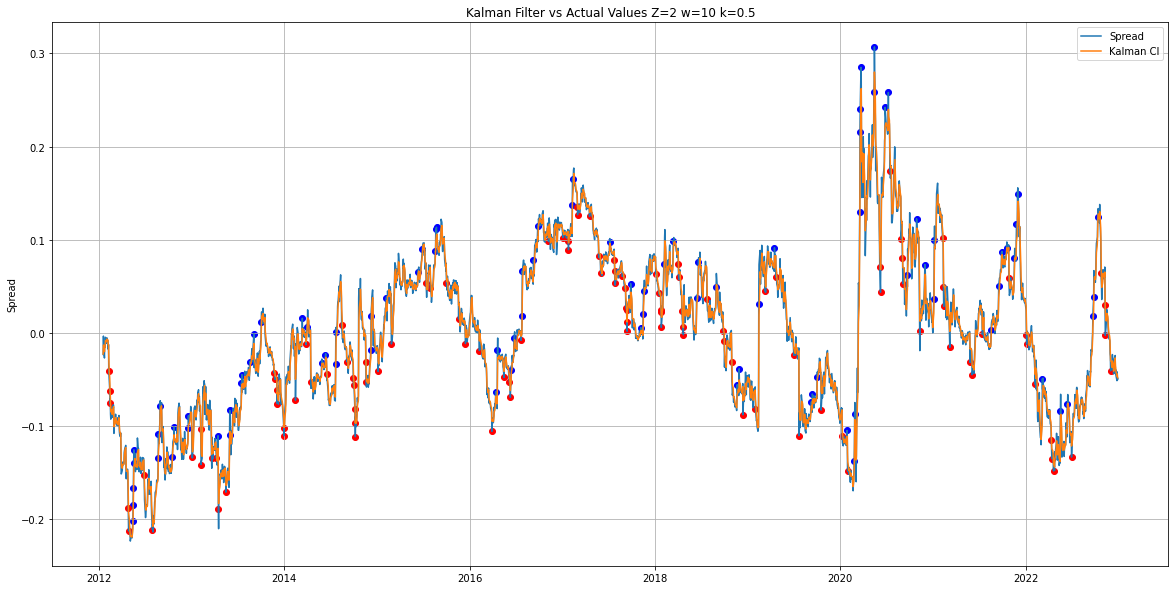

In [ ]:
kf_df2 = kf_df.dropna()
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Spread")

# Plot the actual series and the filter
ax.plot(kf_df2["spread"])
ax.plot(kf_df2["Filter"])

# This code block is used to add confidence intervals when z > 0
#ax.fill_between(data2.index, data2.Lower, data2.Upper, color='b', alpha=.2)

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(kf_df2[kf_df2.test == 1].index, kf_df2[kf_df2.test == 1]["spread"], color = "blue")
ax.scatter(kf_df2[kf_df2.test == -1].index, kf_df2[kf_df2.test == -1]["spread"], color = "red")
ax.legend(["Spread", "Kalman CI"])

ax.grid()

# here we can see the distance is persistent, red dots are persistenly there and similarly blue dots are persistent? we want persistence 
# 

In [ ]:
# Adding Returns and Determining Successful Trades

In [ ]:
# now we should add the values for closing price of coke 

kf_df['coke'] = ko['Close']

# calculate returns 
kf_df["Returns"] = np.log(kf_df["coke"]).diff()

In [ ]:
# Calculate the cumulative returns for the current strategy
kf_df[str(holding_period)+"_signal"] = test_signal
kf_df[str(holding_period)+"_returns"] = np.exp((kf_df[str(holding_period)+"_signal"].shift() * kf_df["Returns"]).cumsum()) - 1

# Calculate whether each signal was a success by finding the difference between the returns
# at the switching points. If the difference is positive, that means the signal made money
kf_df[str(holding_period)+"_success"] = ((kf_df[kf_df.test != 0][str(holding_period)+"_returns"].diff() > 0) * 1).shift(-1)

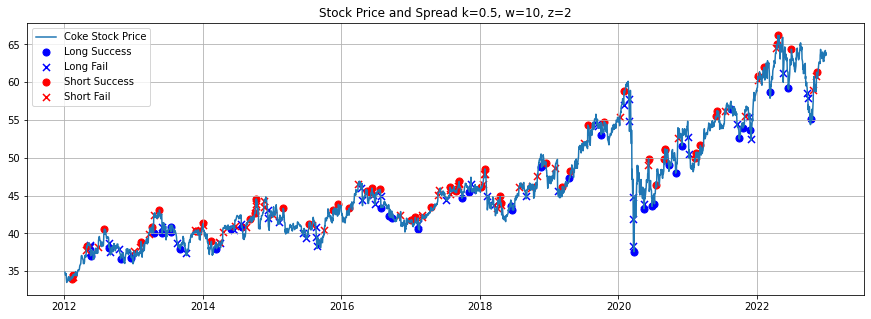

In [ ]:
# plot success and failures 


plt.figure(figsize = (15, 5))

plt.title("Stock Price and Spread"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))

plt.plot(kf_df['coke'])

longsuccess = kf_df[(kf_df[str(s)+"_success"] == 1) & (kf_df["test"] == 1)]
longfail = kf_df[(kf_df[str(s)+"_success"] == 0) & (kf_df["test"] == 1)] 
shortsuccess = kf_df[(kf_df[str(s)+"_success"] == 1) & (kf_df["test"] == -1)]
shortfail = kf_df[(kf_df[str(s)+"_success"] == 0) & (kf_df["test"] == -1)]

plt.scatter(longsuccess.index, longsuccess["coke"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["coke"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["coke"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["coke"], color = 'red', s = 50, marker = "x")

plt.legend(["Coke Stock Price", "Long Success", "Long Fail", "Short Success", "Short Fail"])
plt.grid()

In [ ]:
# Calculate the success and failure rates for long trades
long_success_rate = sum((kf_df["test"] == 1) & (kf_df[str(s) + "_success"] == 1)) / sum(kf_df["test"] == 1)
long_fail_rate = sum((kf_df["test"] == 1) & (kf_df[str(s) + "_success"] == 0)) / sum(kf_df["test"] == 1)

# Calculate the success and failure rates for short trades
short_success_rate = sum((kf_df["test"] == -1) & (kf_df[str(s) + "_success"] == 1)) / sum(kf_df["test"] == -1)
short_fail_rate = sum((kf_df["test"] == -1) & (kf_df[str(s) + "_success"] == 0)) / sum(kf_df["test"] == -1)

# Print the results
print("Long Trades Success Rate: {:.2%}".format(long_success_rate))
print("Long Trades Fail Rate: {:.2%}".format(long_fail_rate))
print("Short Trades Success Rate: {:.2%}".format(short_success_rate))
print("Short Trades Fail Rate: {:.2%}".format(short_fail_rate))


Long Trades Success Rate: 42.22%
Long Trades Fail Rate: 57.78%
Short Trades Success Rate: 48.67%
Short Trades Fail Rate: 50.44%


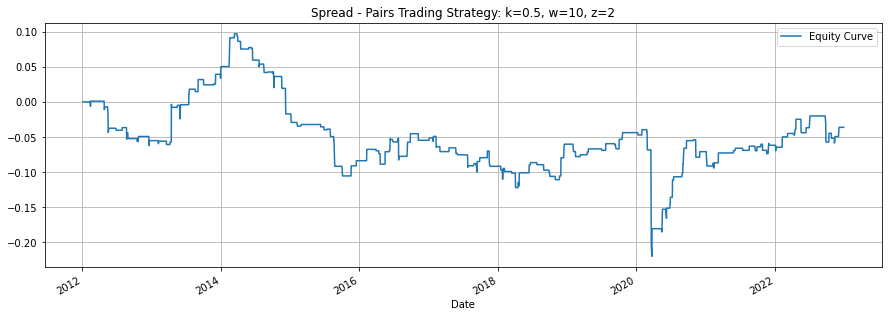

In [ ]:
 # equity line 

plt.figure(figsize = (15, 5))
(kf_df["20_returns"].dropna()).plot()

plt.title("Spread - Pairs Trading Strategy:"+ " k=" + str(k)+", w="+str(w)+", z="+str(z))
plt.legend(["Equity Curve", "Long Success", "Long Fail", "Short Success", "Short Fail"])

plt.grid()

# profits generated over the period wth a CCROR of about xx%
# here we mostly have losses 

In [ ]:
# play with various holding periods and look at the profits for different holding periods. choose the holding period which gives maximum profits 
# look at the persistence, then choose the holding period. if the persistence is very high then choose longer holding period. if the persistence is less then choose shorter holding period. accordingly you can change optimize for k and z. 
# when we have longer horizons we want greater weight to ccurent observation hence we wouldt want greater k. 

In [ ]:
# calculate alpha, beta and gini 
# beta = rate of return every year = alpha + beta (rate of return on s&p500) = RORt = Alpha + Beta (ROR S&P500)
# we want beta to be 0 or negative 
# alpha measures returns not explained by S&P500 but rather explained by my trading strategy 
